<a href="https://colab.research.google.com/github/mfatihkoc/phd_ml/blob/main/test/lane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Long-Term Prediction of Lane Change Maneuver Through a Multilayer Perceptron

The dataset used in this study is the reconstructed NGSIM I-80 vehicle trajectory data during an afternoon peak period 4 - 4:15 PM. The original NGSIM I-80 data from U.S. Federal Highway Administration (FHWA) was collected at a frequency of 10 Hz on Interstate 80 in Emeryville, CA, on April 13, 2005. The study area was a 500 m long highway segment with six main lanes (including a high-occupancy (HOV) lane and an on-ramp).

Seven cameras were installed to record trajectories of all vehicles passing through the study area. Some computer vision techniques were used to process the video data and extract useful information such as position, velocity, and acceleration of all vehicles.

predicting long-term lane change maneuvers (5-10 seconds in advance) in autonomous driving systems and Advanced Driver Assistance Systems (ADAS). Unlike many existing models that use lateral or angle data, this study predicts lane changes based only on longitudinal data (distances, velocities) from nearby vehicles.

In [ ]:
import pandas as pd

data = pd.read_csv('/content/Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data_20241101.csv')

In [ ]:
data.head()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
0,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
1,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
2,2224,6548,1902,1113437421700,41.429,472.901,6042814.264,2133542.012,14.3,6.9,...,NaN,NaN,NaN,NaN,NaN,2208,2211,53.34,2.01,i-80
3,2127,6459,567,1118847624800,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,...,NaN,NaN,NaN,NaN,NaN,2124,2132,48.92,1.30,us-101
4,1033,4827,592,1118848324700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,...,NaN,NaN,NaN,NaN,NaN,1029,1040,38.81,0.92,us-101


In [ ]:
data.describe()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,O_Zone,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway
count,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,...,2.481206e+06,2.481206e+06,2.481206e+06,2.481206e+06,2.481206e+06,2.481206e+06,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07
mean,1.272563e+03,5.174503e+03,8.930487e+02,1.034354e+12,2.794686e+01,9.168111e+02,5.982983e+06,1.936843e+06,1.569627e+01,6.626444e+00,...,1.070281e+02,2.066535e+02,5.623104e-01,2.280568e+00,2.994319e+00,1.095966e+00,1.172694e+03,1.181218e+03,6.241838e+01,5.748307e+02
std,7.792891e+02,2.608943e+03,4.020496e+02,2.915348e+11,2.495012e+01,5.502644e+02,1.076391e+06,2.008363e+05,5.611962e+00,8.725600e-01,...,6.164081e+00,5.856079e+00,1.231587e+00,1.532248e+00,1.025410e+00,3.727930e-01,8.358323e+02,8.371065e+02,7.392077e+01,2.312329e+03
min,1.000000e+00,1.000000e+00,2.000000e+00,1.163019e+09,-3.256250e+02,0.000000e+00,2.230210e+06,1.375533e+06,3.500000e+00,2.000000e+00,...,0.000000e+00,2.010000e+02,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.330000e+02,2.987000e+03,6.190000e+02,1.113437e+12,1.453300e+01,4.512030e+02,6.042757e+06,1.872593e+06,1.380000e+01,5.900000e+00,...,1.020000e+02,2.010000e+02,0.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,4.690000e+02,4.790000e+02,3.140000e+01,1.690000e+00
50%,1.195000e+03,5.222000e+03,8.240000e+02,1.118847e+12,2.932300e+01,8.573970e+02,6.451253e+06,1.873236e+06,1.500000e+01,6.800000e+00,...,1.080000e+02,2.050000e+02,0.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.107000e+03,1.117000e+03,4.977000e+01,2.560000e+00
75%,1.824000e+03,7.354000e+03,1.038000e+03,1.118849e+12,4.332900e+01,1.351873e+03,6.452048e+06,2.133669e+06,1.600000e+01,7.000000e+00,...,1.080000e+02,2.080000e+02,0.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.783000e+03,1.793000e+03,7.434000e+01,4.200000e+00
max,3.366000e+03,1.169100e+04,2.434000e+03,1.118938e+12,1.608840e+02,2.235252e+03,6.452741e+06,2.134845e+06,7.770000e+01,8.500000e+00,...,1.230000e+02,2.230000e+02,5.000000e+00,6.000000e+00,4.000000e+00,3.000000e+00,3.366000e+03,3.366000e+03,1.855750e+03,3.186408e+04


In [ ]:
# List all feature names (column names)
feature_names = data.columns.tolist()
print(feature_names)

['Vehicle_ID', 'Frame_ID', 'Total_Frames', 'Global_Time', 'Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Width', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'O_Zone', 'D_Zone', 'Int_ID', 'Section_ID', 'Direction', 'Movement', 'Preceding', 'Following', 'Space_Headway', 'Time_Headway', 'Location']


In [ ]:


# Check for null values in the DataFrame
data.isnull().sum()

,0
Vehicle_ID,0
Frame_ID,0
Total_Frames,0
Global_Time,0
Local_X,0
Local_Y,0
Global_X,0
Global_Y,0
v_length,0
v_Width,0


In [ ]:
data.describe()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,O_Zone,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway
count,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,...,2.481206e+06,2.481206e+06,2.481206e+06,2.481206e+06,2.481206e+06,2.481206e+06,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07
mean,1.272563e+03,5.174503e+03,8.930487e+02,1.034354e+12,2.794686e+01,9.168111e+02,5.982983e+06,1.936843e+06,1.569627e+01,6.626444e+00,...,1.070281e+02,2.066535e+02,5.623104e-01,2.280568e+00,2.994319e+00,1.095966e+00,1.172694e+03,1.181218e+03,6.241838e+01,5.748307e+02
std,7.792891e+02,2.608943e+03,4.020496e+02,2.915348e+11,2.495012e+01,5.502644e+02,1.076391e+06,2.008363e+05,5.611962e+00,8.725600e-01,...,6.164081e+00,5.856079e+00,1.231587e+00,1.532248e+00,1.025410e+00,3.727930e-01,8.358323e+02,8.371065e+02,7.392077e+01,2.312329e+03
min,1.000000e+00,1.000000e+00,2.000000e+00,1.163019e+09,-3.256250e+02,0.000000e+00,2.230210e+06,1.375533e+06,3.500000e+00,2.000000e+00,...,0.000000e+00,2.010000e+02,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.330000e+02,2.987000e+03,6.190000e+02,1.113437e+12,1.453300e+01,4.512030e+02,6.042757e+06,1.872593e+06,1.380000e+01,5.900000e+00,...,1.020000e+02,2.010000e+02,0.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,4.690000e+02,4.790000e+02,3.140000e+01,1.690000e+00
50%,1.195000e+03,5.222000e+03,8.240000e+02,1.118847e+12,2.932300e+01,8.573970e+02,6.451253e+06,1.873236e+06,1.500000e+01,6.800000e+00,...,1.080000e+02,2.050000e+02,0.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.107000e+03,1.117000e+03,4.977000e+01,2.560000e+00
75%,1.824000e+03,7.354000e+03,1.038000e+03,1.118849e+12,4.332900e+01,1.351873e+03,6.452048e+06,2.133669e+06,1.600000e+01,7.000000e+00,...,1.080000e+02,2.080000e+02,0.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.783000e+03,1.793000e+03,7.434000e+01,4.200000e+00
max,3.366000e+03,1.169100e+04,2.434000e+03,1.118938e+12,1.608840e+02,2.235252e+03,6.452741e+06,2.134845e+06,7.770000e+01,8.500000e+00,...,1.230000e+02,2.230000e+02,5.000000e+00,6.000000e+00,4.000000e+00,3.000000e+00,3.366000e+03,3.366000e+03,1.855750e+03,3.186408e+04


In [ ]:
data = data.select_dtypes(exclude=['object'])
data

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,O_Zone,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway
0,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11
1,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11
2,2224,6548,1902,1113437421700,41.429,472.901,6042814.264,2133542.012,14.3,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,2208,2211,53.34,2.01
3,2127,6459,567,1118847624800,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,2124,2132,48.92,1.30
4,1033,4827,592,1118848324700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,...,NaN,NaN,NaN,NaN,NaN,NaN,1029,1040,38.81,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850521,1355,5622,938,1113438127100,18.275,1464.336,6042648.149,2134520.896,12.3,6.8,...,NaN,NaN,NaN,NaN,NaN,NaN,1351,1361,26.91,15.92
11850522,1474,5688,401,1113438133700,5.509,560.412,6042767.840,2133624.549,17.8,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,1468,1480,74.49,1.73
11850523,398,2368,654,1113437801700,18.903,635.841,6042771.741,2133701.076,15.2,8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,385,406,90.95,3.77
11850524,599,875,577,1113436854400,77.094,621.358,6042831.282,2133693.854,15.3,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,0,611,0.00,0.00


In [ ]:
import pandas as pd

def label_data(data):
    """Labels data for lane change prediction.

    Args:
        data: Pandas DataFrame containing vehicle trajectory data.

    Returns:
        Pandas DataFrame with an added 'label' column.
    """
    # Initialize all labels as 0 (no lane change)
    data['label'] = 0

    # Find lane changes based on 'Lane_ID' changes
    lane_changes = data[data['Lane_ID'] != data['Lane_ID'].shift(-1)]

    # Print the number of detected lane changes for debugging
    print(f"Detected {len(lane_changes)} lane changes.")

    for index in lane_changes.index:
        # Directly label the lane change event
        data.at[index, 'label'] = 1  # Label the row of the lane change

        # Optionally, label the previous row as well, if you want to include it
        if index > 0:
            data.at[index - 1, 'label'] = 1  # Label the previous row as 1

    # Check if the label column is added correctly
    print(data[['Lane_ID', 'label']].head(10))  # Display the first 10 rows of Lane_ID and label for verification

    return data


In [ ]:
data = label_data(data)  # Call the function
print(data['label'].head(5))  # Display the first 5 rows of the label column


Detected 9324504 lane changes.
   Lane_ID  label
0        3      1
1        3      1
2        4      1
3        2      1
4        1      1
5        1      1
6        5      1
7        3      1
8        3      1
9        1      1
0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64


In [ ]:
# Get the updated list of feature names
updated_feature_names = data.columns.tolist()

# Print the updated list
print(updated_feature_names)

['Vehicle_ID', 'Frame_ID', 'Total_Frames', 'Global_Time', 'Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Width', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'O_Zone', 'D_Zone', 'Int_ID', 'Section_ID', 'Direction', 'Movement', 'Preceding', 'Following', 'Space_Headway', 'Time_Headway', 'Location', 'label']


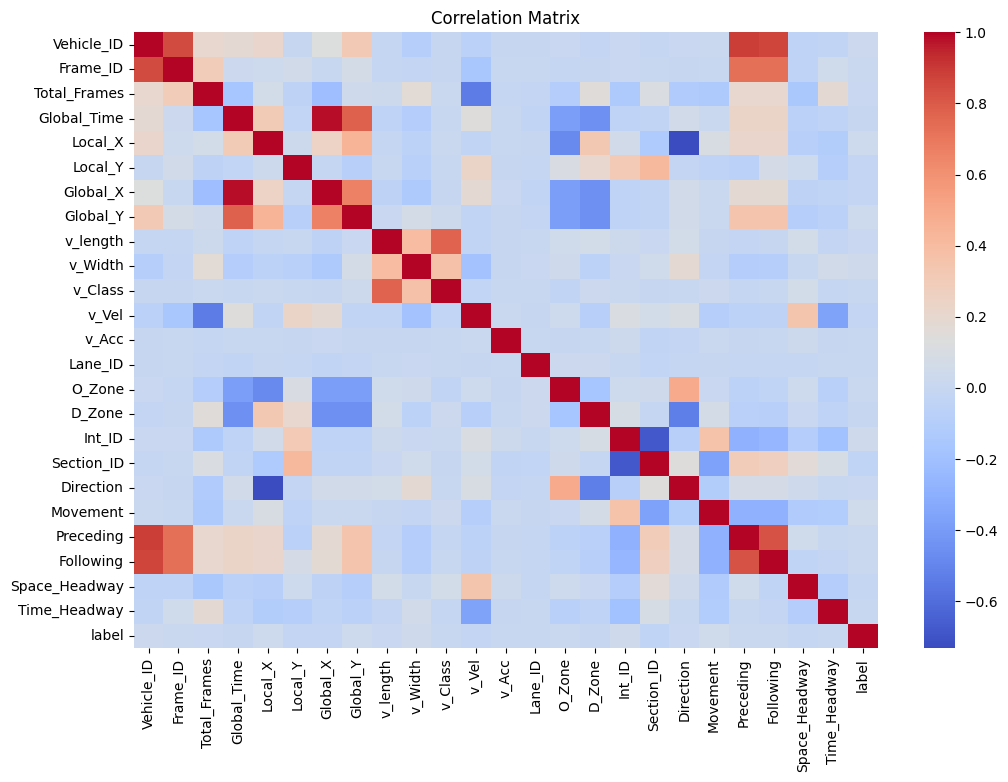

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas if not already imported

# Assuming 'data' is your DataFrame

# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

# Plot the cross-correlation matrix
corr_matrix = numerical_data.corr()

# Plot the cross-correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

The Multilayer Perceptron (MLP) model in this study is used to classify lane change maneuvers based on selected vehicle features. MLP Model Structure
Input Layer: The input layer receives the selected features (longitudinal distances, velocity differences, and lane ID). Each feature corresponds to an input neuron.
Hidden Layers: The MLP includes one or more hidden layers with neurons that use nonlinear activation functions (such as ReLU or sigmoid) to capture complex patterns in the data.
Output Layer: The output layer has a single neuron with a binary classification output, indicating whether the ego vehicle will perform a lane change (1) or keep its lane (0).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define features (X) and target (y)
features = ['Local_X', 'Local_Y', 'v_Vel', 'v_Acc', 'Lane_ID']  # Example features, adjust as needed
target = 'label'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

# Create MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.9532
Precision: 0.9532
Recall: 1.0000
F1-score: 0.9760
